In [12]:
# Simulation for SAT solving shardware
# reference: Shim, Chaeyun, Jooyoung Bae, and Bongjin Kim. "30.3 VIP-Sat: A Boolean Satisfiability Solver Featuring 5× 12 Variable In-Memory Processing Elements with 98% Solvability for 50-Variables 218-Clauses 3-SAT Problems." 2024 IEEE International Solid-State Circuits Conference (ISSCC). Vol. 67. IEEE, 2024.

In [13]:
# 데이터셋 위치  
# /data2/sat/uf50-218  
# /data2/sat/uf20-91 
# 출처: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import numpy as np

def read_cnf_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    clauses = []

    clause_save_start = False
    clause_count = 0
    for line in lines:
        if clause_save_start == True:
            clause = list(map(int, line.strip().split()))
            assert clause[-1] == 0
            clause = clause[:-1]  # Remove the trailing 0
            clauses.append(clause)
            clause_count += 1
            if clause_count == num_clauses:
                break

        if line.startswith(('p')) and clause_save_start == False:
            clause_save_start = True
            _, _, num_vars, num_clauses = line.split()
            num_vars = int(num_vars)
            num_clauses = int(num_clauses)
    assert clause_save_start == True

    clauses = np.array(clauses)
    return clauses, num_vars, num_clauses
# 파일 경로를 지정하세요
file_path = 'example_uf50-03.cnf'
clauses, num_vars, num_clauses= read_cnf_file(file_path)

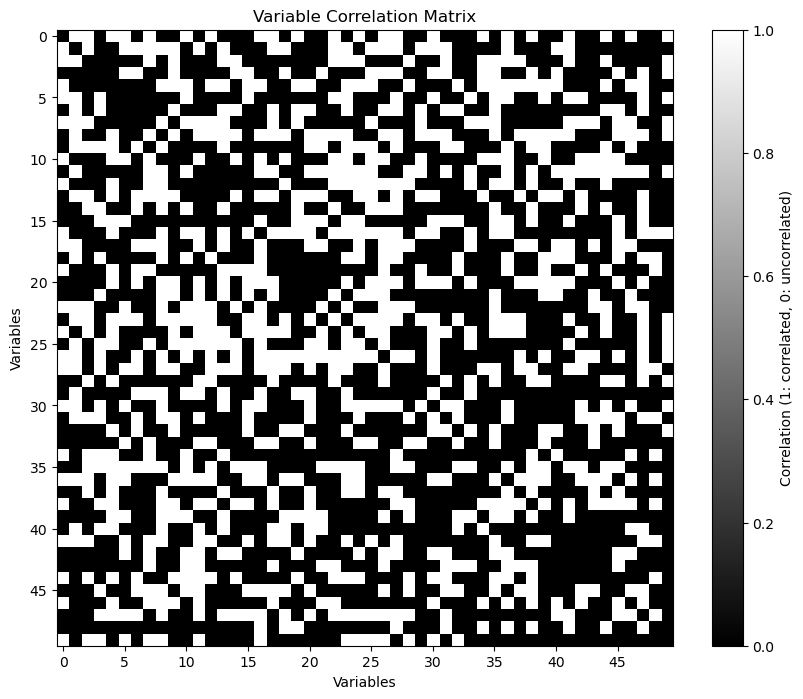

In [16]:
correlation_matrix = np.zeros((num_vars, num_vars), dtype=int)

# Filling correlation matrix
for clause in clauses:
    for i, var1 in enumerate(clause):
        for var2 in clause[i+1:]:
            abs_var1, abs_var2 = abs(var1) - 1, abs(var2) - 1  # Index starts at 0
            correlation_matrix[abs_var1, abs_var2] = 1
            correlation_matrix[abs_var2, abs_var1] = 1

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='gray', interpolation='nearest')
plt.colorbar(label='Correlation (1: correlated, 0: uncorrelated)')
plt.title('Variable Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(np.arange(0, num_vars, 5))
plt.yticks(np.arange(0, num_vars, 5))
plt.grid(False)
plt.show()